# Cryptocurrency Prediction Analysis & Buying Actions
***

**Disclaimer:** I am not a financial institution nor do I represent one. All that is provided here is educational material: Do not take this information as professional investment advice. 
***

### Importing Necessary Python Libraries
***

In [106]:
%matplotlib inline

import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

### Collecting Files & Converting to DataFrames
***

In [107]:
#1)Finding .csv files to load and converting to dataframes

##b)defining our file directory to pick up files of interest
file_path = "C:\\Users\\Mike\\PythonScripts\\Data_New\\"

##c)using 'glob' function to pick up all .csv files, returning a list
csv_files = glob.glob(file_path + "*.csv")
#print(csv_files)

##d)looping through list of files stored in 'c)' and converting to dataframes
data_files_df = []  #initializing list to store dataframes converted from file paths stored in 'csv_files'

for file in csv_files:
    data = pd.read_csv(file, parse_dates=[0], index_col=0, usecols = [0,4]) #1st column is used as index for each dataframe
    data_files_df.append(data)

#print(data_files_df)

##e)unpacking dataframes stored in 'data_files_df' list in part d)
bitcoin_df, ethereum_df, litecoin_df, zcash_df = data_files_df

##f) renaming columns of each dataframe so we can easily tell which cryptocurrency we are working on
bitcoin_df.rename(columns = {"Close":"VALUE_BC"}, inplace=True)  
ethereum_df.rename(columns = {"Close":"VALUE_ET"}, inplace=True)   
litecoin_df.rename(columns = {"Close":"VALUE_LC"}, inplace=True) 
zcash_df.rename(columns = {"Close":"VALUE_ZC"}, inplace=True)  

# print(bitcoin_df)
# print(ethereum_df)
# print(litecoin_df)
# print(zcash_df)

### Joining all Files into Single DataFrame
***

In [108]:
#3) Performing an outer join on dataframes with pd.concat to pair up data on same dates, making one big dataframe

df = pd.concat([bitcoin_df, ethereum_df, litecoin_df, zcash_df], axis = 1) #axis = 1, means stacking as columns
# print("\n This is a joined dataframe holding values of all cryptocurrencies:\n")
print(df)

            VALUE_BC  VALUE_ET  VALUE_LC  VALUE_ZC
Date                                              
2013-04-28    134.21       NaN      4.35       NaN
2013-04-29    144.54       NaN      4.38       NaN
2013-04-30    139.00       NaN      4.30       NaN
2013-05-01    116.99       NaN      3.80       NaN
2013-05-02    105.21       NaN      3.37       NaN
2013-05-03     97.75       NaN      3.04       NaN
2013-05-04    112.50       NaN      3.48       NaN
2013-05-05    115.91       NaN      3.59       NaN
2013-05-06    112.30       NaN      3.37       NaN
2013-05-07    111.50       NaN      3.33       NaN
2013-05-08    113.57       NaN      3.41       NaN
2013-05-09    112.67       NaN      3.42       NaN
2013-05-10    117.20       NaN      3.44       NaN
2013-05-11    115.24       NaN      3.35       NaN
2013-05-12    115.00       NaN      3.27       NaN
2013-05-13    117.98       NaN      3.28       NaN
2013-05-14    111.50       NaN      2.82       NaN
2013-05-15    114.22       NaN 

### Plotting  Values of Each Cryptocurrency Overtime
***

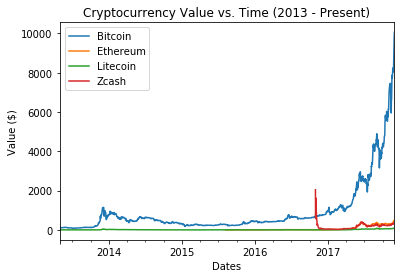

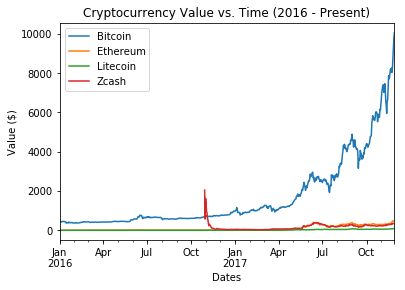

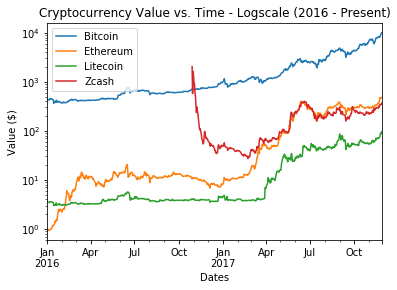

In [109]:
#4) Plotting dataframe to get a picture of cryptocurrencies value over time

##a) plotting all cryptocurrencies on one plot
plt.figure()
df.plot()

plt.title("Cryptocurrency Value vs. Time (2013 - Present)")
plt.xlabel("Dates"), plt.ylabel("Value ($)")
plt.legend(("Bitcoin", "Ethereum", "Litecoin", "Zcash"), loc = 'upper left')

###b) making sublplots of each crypto 
#plt.figure()
#df.plot(subplots=True, layout=(2,2), sharex=False) #-1 can be used to calculate  number of rows given number columns you want (viceversa)

##c) plotting all cryptocurrenices from 2016 onward (most action)
df.loc["2016":, :].plot() #partial string selection and logscaleY axis

plt.title("Cryptocurrency Value vs. Time (2016 - Present)")
plt.legend(("Bitcoin", "Ethereum", "Litecoin", "Zcash"), loc = 'upper left') #adjusting labels of legend and location for easy read
plt.xlabel("Dates"), plt.ylabel("Value ($)")

##d) Logscale plot from 2016 onward
plt.figure()
df.loc["2016":, :].plot(logy=True) #partial string selection and logscaleY axis

plt.title("Cryptocurrency Value vs. Time - Logscale (2016 - Present)")
plt.legend(("Bitcoin", "Ethereum", "Litecoin", "Zcash"), loc = 'upper left') #adjusting labels of legend and location for easy read
plt.xlabel("Dates"), plt.ylabel("Value ($)")

plt.show()


### Investigating Correlations Between Cryptocurrencies
***


The correlation matrix from 2013 - present is:

           VALUE_BC  VALUE_ET  VALUE_LC  VALUE_ZC
VALUE_BC  1.000000  0.913293  0.913882  0.317703
VALUE_ET  0.913293  1.000000  0.967474  0.418377
VALUE_LC  0.913882  0.967474  1.000000  0.371804
VALUE_ZC  0.317703  0.418377  0.371804  1.000000

The correlation matrix from 2017 - present is:

           VALUE_BC  VALUE_ET  VALUE_LC  VALUE_ZC
VALUE_BC  1.000000  0.836879  0.887066  0.717885
VALUE_ET  0.836879  1.000000  0.937040  0.957959
VALUE_LC  0.887066  0.937040  1.000000  0.849409
VALUE_ZC  0.717885  0.957959  0.849409  1.000000


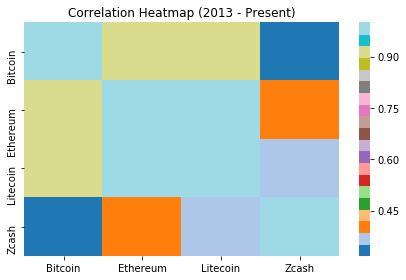

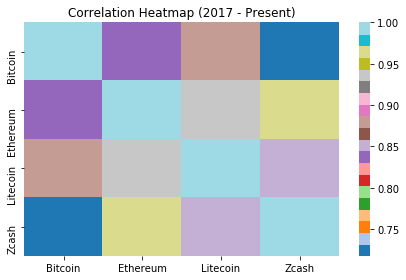

In [110]:
#4-1) Investigating correlation, if any, between cryptos -- all data

#a) plotting a scatter_matrix
# plt.figure()
# pd.plotting.scatter_matrix(df, diagonal="kde")

#b) plotting heatmap of 
plt.figure()

xlabel = ["Bitcoin", "Ethereum", "Litecoin", "Zcash"]
ylabel = ["Bitcoin", "Ethereum", "Litecoin", "Zcash"]
sns.heatmap(df.corr(method='pearson'), cmap='tab20', xticklabels = xlabel, yticklabels = ylabel)
plt.title("Correlation Heatmap (2013 - Present)")
plt.tight_layout()
print("\nThe correlation matrix from 2013 - present is:\n\n", df.corr(method='pearson'))

#4-2) Investigation correlation from 2017 onward

#a) plotting a scatter matrix from 2017 onward
# plt.figure() 
# pd.plotting.scatter_matrix(df.loc["2017":, :], diagonal="kde")

#b) plotting a heatmap from 2017 onward
plt.figure()
sns.heatmap(df.loc["2017":, :].corr(method='pearson'), cmap="tab20", xticklabels = xlabel, yticklabels = ylabel)
plt.title("Correlation Heatmap (2017 - Present)")
print("\nThe correlation matrix from 2017 - present is:\n\n", df.loc["2017":, :].corr(method='pearson'))
plt.tight_layout()
plt.show()

### Data Wrangling: Extracting Cryptocurrency Values from DataFrame
***

In [111]:
#5) Extracting individual columns from combined dataframe as numpy arrays to faciliate 
#   matrix Reshaping for later making predictions with sklearn

#a) finding number of columns in combined dataframe, df
columns_in_df = len(df.columns) #counts number of columns in dataframe
print(df.columns)

#b) extracting each column from combined dataframe seperately using a for loop
df_column_values = [] #initializing empty list to store numpy arrays of extracted dataframe columns

for column in range(0,columns_in_df):
    extracted_column_values = df.iloc[:, column].values # extracts columns from dataframe as an array
    
    #checking if extracted array has nan's
    if np.sum(np.isnan(extracted_column_values)) > 0: #checking number of nans present in array
        extracted_column_values = extracted_column_values[~np.isnan(extracted_column_values)] #filtering array to return all values that aren't nan's
        
    else:
        extracted_column_values #There are no nan's in array, just give me the original array
    
    df_column_values.append(extracted_column_values) #append array to a list

#print(df_column_values)

#c)unpacking extracted column arrays stored in 'df_column_values'  list

bc_values_np, et_values_np, lc_values_np, zc_values_np = df_column_values

#d) printing each extracted column as an array with nan's removed
# print("\n These is the extracted Bitcoin array with nan's removed:\n\n",bc_values_np)
# print("\n These is the extracted Ethereum array with nan's removed:\n\n",et_values_np)
# print("\n These is the extracted Litecoin array with nan's removed:\n\n",lc_values_np)
# print("\n These is the extracted Zcash array with nan's removed:\n\n",zc_values_np)

Index(['VALUE_BC', 'VALUE_ET', 'VALUE_LC', 'VALUE_ZC'], dtype='object')


### Data Wrangling: Creating Function to Reshape Value Arrays
***

In [112]:
#6) Writing a function to reshape data into square matrix based on the number
#   of days we would like to use to make a future prediction

def reshape_array(array, number_of_days=9): #default argument must precede non-default argument 
    """Given a number of days, as integer, the function will reshape matrix
    so that it is square and fill missing values with the median value of dataset"""
    
    length_of_array = len(array)
      
    if length_of_array % number_of_days != 0: #if there is a remainder, we need to make matrix square
       
        #a)finding number of rows we need to make matrix square
        req_num_rows_sq = math.ceil(length_of_array/number_of_days) 
        
        #b)finding total number or elements are in new square matrix
        new_size_of_sq = req_num_rows_sq * number_of_days
        
        #c)finding number of elements we need to add in to make matrix square
        num_elements_to_add = new_size_of_sq - length_of_array
        
        #c-1) calculating median values of array for two cases: 1) when nan's are present 2)no Nans
        
        if(np.isnan(array).sum()>0): #Checks if nan's are present in array. isnan() returns boolean array. When a 'nan' is present a 'True' is returned.
            
            median = np.nanmedian(array) #if nan's are present, we will find median without nan's
        
        else:#no nan's are present, typical approach to find median
            median = np.median(array)
        
        #d)adding elements to matrix to make square
        values_for_square_array = [] #this is a list - initialiazing array to store new values to add to 'array' to make square
       
        for element in range(num_elements_to_add): # looping around the exact number of times we need to make matrix square(i.e., the number of empty slots we need to fill to make square)
            value_to_add = median #adding median value of 'array' to empty slots in square matrix
            values_for_square_array.append(value_to_add) #adds median value to empty list
        
        #e)Now out of for loop and converting list of values in 'values_for_square_array' to a numpy array
        values_for_square_array_np = np.array(values_for_square_array)
        
        #f)Adding new values to end of original array to make it a square array
        array_sq = np.append(array, values_for_square_array_np)
        
        #g)Finally, reshaping this newly squared array
        X = array_sq.reshape(req_num_rows_sq, number_of_days)
        
        #h)Flattening reshaped matrix to a 1-d array
        X_flat = np.ndarray.flatten(X)
   
    else:#array is already square, so just need to reshape 1-d array
        
        #a) Determing number of rows of already square matrix
        rows = int(length_of_array/number_of_days)
       
        #b) Reshaping array to a square matrix
        X = array.reshape(rows, number_of_days)
        
        #c) Flattening reshaped matrix to a 1-d array
        X_flat = np.ndarray.flatten(X)
    
    return((X, X_flat)) #returns tuple of two variables


## Calling 'Reshape' Function  to Reshape Value Arrays
***

In [113]:
#7) Calling 'reshape_array()" to reshape the arrays of each cryptocurrency into
#   a square matrix with a default of 5 columns (number of days we will use to predictions).  
#   A flattend 1-d array  of the reshaped matrix is also returned. 
#   The arrays being fed into function come from step 5 of program. 
    
bc_values_np_sq, bc_values_np_sq_flat = reshape_array(bc_values_np) 
et_values_np_sq, et_values_np_sq_flat = reshape_array(et_values_np)
lc_values_np_sq, lc_values_np_sq_flat = reshape_array(lc_values_np)
zc_values_np_sq, zc_values_np_sq_flat = reshape_array(zc_values_np)

#print("\n Calling reshape_arrray function to reshape numpy arrays of cryptocurrencies:\n" )  

print("Bitcoin Array Reshaped:\n", bc_values_np_sq, "\n\n")
print("Bitcoin Array Reshaped & Flattened:\n", bc_values_np_sq_flat, "\n\n")

# print("Ethereum Array Reshaped:\n", et_values_np_sq, "\n\n")
# print("Ethereum Array Reshaped & Flattened:\n", et_values_np_sq_flat, "\n\n")   

# print("Litecoin Array Reshaped:\n", lc_values_np_sq, "\n\n")
# print("Litecoin Array Reshaped & Flattened:\n", lc_values_np_sq_flat, "\n\n")

# print("Zcash Array Reshaped:\n", zc_values_np_sq, "\n\n")
# print("Zcash Array Reshaped & Flattened:\n", zc_values_np_sq_flat, "\n\n")

Bitcoin Array Reshaped:
 [[   134.21    144.54    139.   ...,    112.5     115.91    112.3 ]
 [   111.5     113.57    112.67 ...,    117.98    111.5     114.22]
 [   118.76    123.02    123.5  ...,    123.89    126.7     133.2 ]
 ..., 
 [  7143.58   6618.14   6357.6  ...,   7315.54   7871.69   7708.99]
 [  7790.15   8036.49   8200.64 ...,   8253.69   8790.92   9330.55]
 [  9818.35  10058.8     455.67 ...,    455.67    455.67    455.67]] 


Bitcoin Array Reshaped & Flattened:
 [ 134.21  144.54  139.   ...,  455.67  455.67  455.67] 




### Data Wrangling: Creating Function to Split into Testing & Training Data -- Single Model
***

In [114]:
#8) Write function to split test and train data

def split_test_train(feature_matrix, feature_matrix_flat, train_split_pct = .70):
    """ Given a reshaped and flat feature matrix, this function splits
        matrices into test and train data for a single model"""
        
    #a) Finding number of rows and cols in feature matrix
    feature_matrix_shape = feature_matrix.shape
    
    #a-1) Unpacking rows and columns
    rows, columns = feature_matrix_shape
    
    #b) Determing number of rows to use for training and testing
    fm_rows_used = math.ceil(rows * train_split_pct) #rounds up to nearest integer
    
    fm_rows_leftover = rows - fm_rows_used
    
    #c) Splitting feature matrix into Xtrain and Xtest
    Xtrain = feature_matrix[: fm_rows_used]
    Xtest = feature_matrix[fm_rows_used : rows-1] #last row is omitted becuase wont have any future data to compare to.
    
    #d) Extracting every 5th day value from flattened feature matrix with loop
    pred_value_originals = [] #initialize empty list
    
    for value in range(columns, len(feature_matrix_flat), columns):
        pred_value_originals.append(feature_matrix_flat[value])
        
    #converting list to a numpy array
    pred_value_originals_np = np.array(pred_value_originals)
    
    #e) Splitting Ytrain and Ytest
    Ytrain = pred_value_originals_np[: fm_rows_used]
    Ytest = pred_value_originals_np[fm_rows_used : rows -1] #last row is omitted becuase wont have any future data to compare to.
    
    #f) Returning variables for future use
    return((Xtrain, Xtest, Ytrain, Ytest))

### Calling Fuction to Split Data into Testing & Training Samples
***

In [115]:
#9) Using split_test_train() function to split data into testing and training data

#a) splitting bitcoin data
Xtrain_bc, Xtest_bc, Ytrain_bc, Ytest_bc = split_test_train(bc_values_np_sq, bc_values_np_sq_flat)

#print("\n Split test and train data for Bitcoin:\n")
#    
#print("\nThis is Xtrain for Bitcoin:\n\n", Xtrain_bc)
#print("\nThis is Xtest for Bitcoin:\n\n", Xtest_bc)    
#print("\nThis is Ytrain for Bitcoin:\n\n", Ytrain_bc)    
#print("\nThis is Ytest for Bitcoin:\n\n", Ytest_bc)    

#b) splitting ethereum data 
Xtrain_et, Xtest_et, Ytrain_et, Ytest_et = split_test_train(et_values_np_sq, et_values_np_sq_flat)    

#print("\n Split test and train data for Ethereum:\n")
    
#print("\nThis is Xtrain for Ethereum:\n", Xtrain_et)
#print("\nThis is Xtest for Ethereum:\n\n", Xtest_et)    
#print("\nThis is Ytrain for Ethereum:\n\n", Ytrain_et)    
#print("\nThis is Ytest for Ethereum:\n\n", Ytest_et)

#c) splitting litecoin data
Xtrain_lc, Xtest_lc, Ytrain_lc, Ytest_lc = split_test_train(lc_values_np_sq, lc_values_np_sq_flat)

#d) splitting zcash data
Xtrain_zc, Xtest_zc, Ytrain_zc, Ytest_zc = split_test_train(zc_values_np_sq, zc_values_np_sq_flat)

### Creating Function to Train Model, Cross Validate & Make Predictions
***

In [116]:
#11) Write a function to train a specific machine learing model and make predictions
def clf_train_predict(model, Xtrain, Xtest, Ytrain, param_tune = False, param_candidates=0):
    """This function allows you to specify whether you have parameters to tune. If you do have parameters to tune
        the parameters can be passed into function as a dictionary. GridSearchCV will be called to determine 
        optimal tuning parameter. Regardless if you have parameters to tune, your specified machine learing 
        algorithm will be trained, and used the trained to make predictions using Xtest."""
    
    param_grid = param_candidates #parameter grid to be used in grid search if 'param_tune=True'
    
    if param_tune == False:
        #a) Training our model
        clf = model.fit(Xtrain, Ytrain)
    
        #b) Finding length (number of rows) of Xtest
        len_xtest = len(Xtest)
    
        #c) Making predictions using trained model and Xtest using loop
    
        pred_values = [] #initializing empty list to stroe predictions
    
        for fm_row in range(0, len_xtest):
            pred_value = clf.predict(Xtest[[fm_row]])[0] # each row is passed to trained model to make prediction. Double brackets get rid of deprecation warning and [0] extracts value from array. 
            pred_values.append(pred_value)
    
        #d) Converting list to a numpy array
        pred_values_np = np.array(pred_values)
    
        #e) Returning predictions
        return(pred_values_np)
    
    else:
        
        #a) Instantiate model
        clf = model
        
        #b) Call GridSearch
        clf_cv = GridSearchCV(clf, param_grid,cv=3, n_jobs=-1)
        
        #c) Train model with results from GridSearchCV
        clf_cv.fit(Xtrain, Ytrain)
        
        #d) Finding length (number of rows) of Xtest
        len_xtest = len(Xtest)
    
        #e) Making predictions using trained model and Xtest using loop
    
        pred_values = [] #initializing empty list to stroe predictions
    
        for fm_row in range(0, len_xtest):
            pred_value = clf_cv.predict(Xtest[[fm_row]])[0] # each row is passed to trained model to make prediction. Double brackets get rid of deprecation warning and [0] extracts value from array. 
            pred_values.append(pred_value)
    
        #d) Converting list to a numpy array
        pred_values_np = np.array(pred_values)
    
        #e) Returning predictions
        return(pred_values_np, clf_cv.best_params_)
        

### Calling Function to Train Model & Make Predictions
***

In [117]:
#12) Using clf_train_predict() to make predictions 

##Linear Regression
#a) making predictions for bitcoin 
pred_bitcoin_lreg = clf_train_predict(LinearRegression(),Xtrain_bc, Xtest_bc, Ytrain_bc)

print("\nThese are the bitcoin predictions:\n\n", pred_bitcoin_lreg)

#b) making predictions for ethereum
pred_ethereum_lreg = clf_train_predict(LinearRegression(),Xtrain_et, Xtest_et, Ytrain_et)

print("\nThese are the Ethereum predictions:\n\n", pred_ethereum_lreg)

#c) making predictions for litecoin
pred_litecoin_lreg = clf_train_predict(LinearRegression(),Xtrain_lc, Xtest_lc, Ytrain_lc)

print("\nThese are the litecoin predictions:\n\n", pred_litecoin_lreg)

#d) making predictins for zcash
pred_zcash_lreg = clf_train_predict(LinearRegression(),Xtrain_zc, Xtest_zc, Ytrain_zc)

print("\nThese are the litecoin predictions:\n\n", pred_zcash_lreg)

#______________________
#Ridge Regression  -- Addressing possible overfitting with regularization
#a) Bitcoin
pred_bitcoin_ridge, bitcoin_ridge_best_param = clf_train_predict(Ridge(),Xtrain_bc, Xtest_bc, Ytrain_bc, param_tune=True, param_candidates={'alpha': np.arange(1,5000)})

print("\nThese are the bitcoin predictions with Ridge:\n\n", pred_bitcoin_ridge)
print("Best Parameter(s):",bitcoin_ridge_best_param)

#b) Ethereum
pred_ethereum_ridge, ethereum_ridge_best_param = clf_train_predict(Ridge(),Xtrain_et, Xtest_et, Ytrain_et, param_tune=True, param_candidates={'alpha': np.arange(1,5000)})
print("\nThese are the Ethereum predictions with Ridge:\n\n", pred_ethereum_ridge)
print("Best Parameter(s):",ethereum_ridge_best_param)

#c) Litecoin
pred_litecoin_ridge, litecoin_ridge_best_param = clf_train_predict(Ridge(),Xtrain_lc, Xtest_lc, Ytrain_lc, param_tune=True, param_candidates={'alpha': np.arange(1,5000)})
print("\nThese are the Litecoin predictions with Ridge:\n\n", pred_litecoin_ridge)
print("Best Parameter(s):",litecoin_ridge_best_param)

#d) Zcash
pred_zcash_ridge, zcash_ridge_best_param  = clf_train_predict(Ridge(),Xtrain_zc, Xtest_zc, Ytrain_zc, param_tune=True, param_candidates={'alpha': np.arange(1,5000)})
print("\nThese are the Zcash predictions with Ridge:\n\n", pred_zcash_ridge)
print("Best Parameter(s):",zcash_ridge_best_param)


These are the bitcoin predictions:

 [  649.10899952   559.87495771   565.25982444   583.62194524   571.17212515
   598.72225315   608.21320276   607.18143209   616.10338237   646.09887626
   689.54692677   720.57093373   700.69169423   762.98920816   756.10288989
   774.01930947   790.62729958  1003.1239601    928.17196118   788.94687226
   860.83752863  1026.8696435    983.1837273   1100.89825547  1250.77700339
  1059.6925516   1038.46931306   960.39626462  1221.45951895  1170.34098331
  1273.50102432  1529.19703313  1728.90567556  2028.93166961  2157.36640364
  2890.68913791  2605.17075047  2446.09824033  2552.3658778   2200.47446135
  2775.77189208  2735.29376965  3483.24822185  4242.80680798  4465.53968698
  4547.37081204  3774.56924678  3838.7457343   4423.74870269  5643.41606412
  5887.9116464   5955.64247895  7550.41495965  7792.29073074  9516.08634867]

These are the Ethereum predictions:

 [  51.74747515   45.19278378   49.85658995   60.9635629    96.29581595
   92.43368538 

### Creating Function to Plot Predictions Against Original Values
***

In [118]:
#13) Creating a function to plot prediction and original values

def plot_pred(Xtest, Ytest, pred_array, crypto_name, model_used):
    """This function will plot original and predicted values of a cryptocurrency."""
    #a) Creating array of sequential numbers with same length as Ytest
    pred_days = np.arange(0,len(Ytest))

    #b) Making plot
    plt.figure()#allow you to plot seperate instances. It opens a new figure 
    plt.plot(pred_days, Ytest) #plotting original values
    plt.plot(pred_days, pred_array, marker ='.', markersize = 7,color='red', alpha=.5)
    
    #c) Adding labels to plot
    plt.title("{} 1 Day Predictions Using {} Days of Historical Data\n".format(crypto_name,len(Xtest[0])))
    plt.xlabel("Prediction Day")
    plt.ylabel("Value ($)")
    plt.legend(("Original", "Predicted - " + model_used), loc = "best") #making legend with labels specified
    plt.tight_layout()

### Calling Function to Plot Predictions against Original Values
***

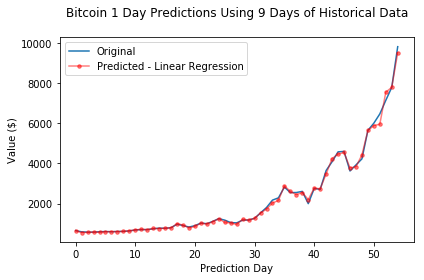

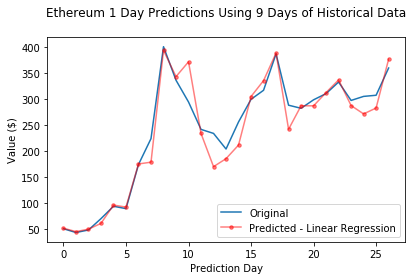

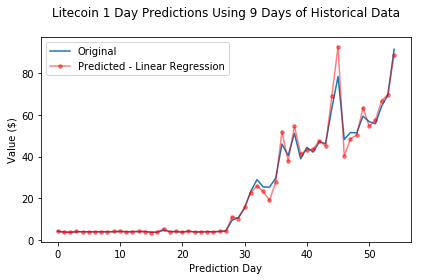

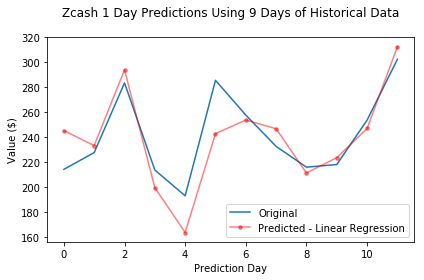

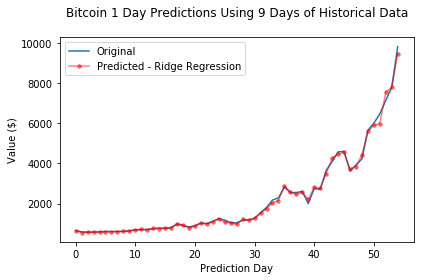

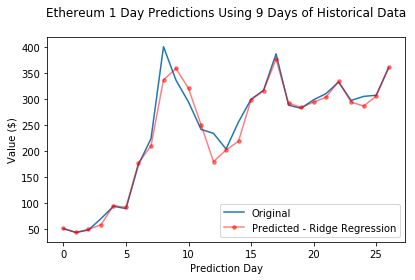

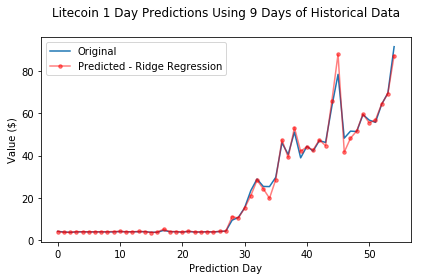

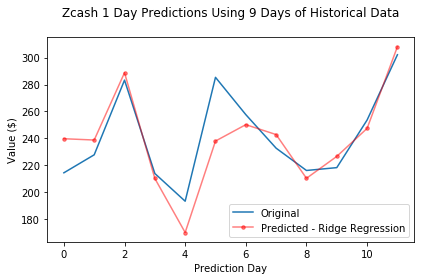

In [119]:
#14) Plotting orginal and predicted values using plot_pred() 

#a) Plotting Bitcoin predictions
plot_pred(Xtest_bc, Ytest_bc, pred_bitcoin_lreg, "Bitcoin", "Linear Regression")

#b) Plotting Ethereum predictions
plot_pred(Xtest_et, Ytest_et, pred_ethereum_lreg, "Ethereum", "Linear Regression")

#c) Plotting Litecoin predictions
plot_pred(Xtest_lc, Ytest_lc, pred_litecoin_lreg, "Litecoin", "Linear Regression")

#d) Plotting Litecoin predictions
plot_pred(Xtest_zc, Ytest_zc, pred_zcash_lreg, "Zcash", "Linear Regression")

##_________________________
##Ridge Regression

#a) Plotting Bitcoin
plot_pred(Xtest_bc, Ytest_bc, pred_bitcoin_ridge, "Bitcoin", "Ridge Regression")

#b) Plottting Ethereum 
plot_pred(Xtest_et, Ytest_et, pred_ethereum_ridge, "Ethereum", "Ridge Regression")

#c) Plotting Litecoin
plot_pred(Xtest_lc, Ytest_lc, pred_litecoin_ridge, "Litecoin", "Ridge Regression")

#d) Plotting Zcash
plot_pred(Xtest_zc, Ytest_zc, pred_zcash_ridge, "Zcash", "Ridge Regression")

### Creating Function to Combine Original and Predicted Values Along with Trading Action
***

In [120]:
#15) Writing a function to combine original and predicted values of cryptocurrency

def pred_compare_df(orig_val_array, pred_val_array):
    """ Combines arrays of original and prediction values into a dataframe,
        and determines if you should buy or hold the cryptocurrency for longterm investment. 
        It also tells us if we were mislead by our predictions."""
        
    #a) Creating a dictionary to define columns that should hold data
    dict_pred = {"Original_Value": orig_val_array, "Predicted_Value": pred_val_array}
    
    #b) Converting dictionary to dataframe
    df_pred = pd.DataFrame(dict_pred)
    
    #c) Printing statement to identify dataframe
    #title_df = print("\nThis is a combined dataframe for {}:\n".format(crypto_name))
    
    #d) Calculating percent change between predicted and original value and assigning to a column in this df   
    df_pred["% Error"] = (df_pred["Predicted_Value"] - df_pred["Original_Value"]) / df_pred["Original_Value"] *100
    
    #e) Determining if you should by or hold 

    #1)determining difference between consecutive rows (essentially calculating slope) in a predicted values column
    df_pred["Action_Pred"] =np.where(df_pred["Predicted_Value"].diff()<0, "Buy", "Hold")
   
    #2)determining difference between consecutive rows (essentially calculating slope) in  orignal values column
    df_pred["Action_Orig"] =np.where(df_pred["Original_Value"].diff()<0, "Buy", "Hold")
   
    #3)determining if we were mislead by our predictions (if our pred tells us to 'buy' and original values suggest a 'hold', we will have been mislead. The reverse holds as well)
    df_pred["Mislead"] = np.where(df_pred["Action_Pred"].values!=df_pred["Action_Orig"].values, "Yes", "No")
    
    #) Returning Variables
    return df_pred

### Calling Function to Prepare DataFrame & Determine Successes of Trading Action 
***

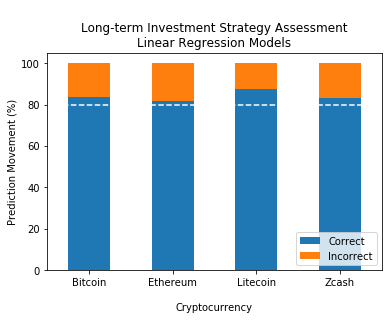

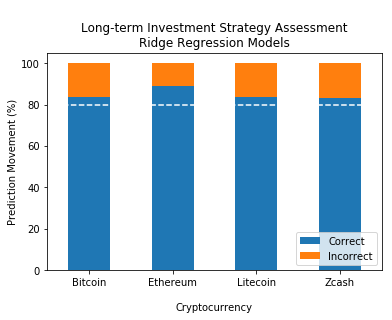

In [121]:
#16) Creating dataframes from each cryptocurrency of original and predicted values
    #using pred_compare_df() and make stacked bar plots to assess trading strategy

## Linear Regression - Analyzing Investment Strategy movement predictions
##_________________________________________________________________________
#a) Comparison DataFrames for Linear Regression Models
combined_df_bc = pred_compare_df(Ytest_bc,pred_bitcoin_lreg)
# print("\nThis is a combined df of Bitcoin:\n\n", combined_df_bc)

combined_df_et = pred_compare_df(Ytest_et,pred_ethereum_lreg)

combined_df_lc = pred_compare_df(Ytest_lc,pred_litecoin_lreg)

combined_df_zc = pred_compare_df(Ytest_zc,pred_zcash_lreg)


#b) For Each comparison DataFrame need to count number of times 'correct'and 'incorrect' 
#Using value_counts() on 'Mislead' column of each dataframe to count number of times 'correct' and 'incorrect'

bc_lr_invst_move = combined_df_bc['Mislead'].value_counts()#counts how many times made correct and incorrect move

et_lr_invst_move = combined_df_et['Mislead'].value_counts()

lc_lr_invst_move = combined_df_lc['Mislead'].value_counts()

zc_lr_invst_move = combined_df_zc['Mislead'].value_counts()

# print(bc_lr_invst_move)

#c) Making summary dataframe by joining individual series

#concatenating value_count() series for each cryptocurrency
lr_invst_move_summary_df = pd.concat([bc_lr_invst_move, et_lr_invst_move, lc_lr_invst_move, zc_lr_invst_move], axis=1)

#renaming columns of dataframe to correspond to each crypto
lr_invst_move_summary_df.columns = ["Bitcoin", "Ethereum", "Litecoin", "Zcash"]

#renaming index to labels of "Correct" or "Incorrect"
lr_invst_move_summary_df.index = ["Correct", "Incorrect"]

# print("Summary of long-term investing strategy movements - Linear Regression Models:\n\n", lr_invst_move_summary_df)

#d) Putting each column in dataframe in terms of percentage 
lr_invst_move_summary_df["Bitcoin"] = (lr_invst_move_summary_df["Bitcoin"]/lr_invst_move_summary_df["Bitcoin"].sum()).round(3)*100

lr_invst_move_summary_df["Ethereum"] = (lr_invst_move_summary_df["Ethereum"]/lr_invst_move_summary_df["Ethereum"].sum()).round(3)*100

lr_invst_move_summary_df["Litecoin"] = (lr_invst_move_summary_df["Litecoin"]/lr_invst_move_summary_df["Litecoin"].sum()).round(3)*100

lr_invst_move_summary_df["Zcash"] = (lr_invst_move_summary_df["Zcash"]/lr_invst_move_summary_df["Zcash"].sum()).round(3)*100

#e) Making barplot
plt.figure()

lr_invst_move_summary_df.T.plot(kind='bar', stacked=True)#Transposing dataframe allows us to swap columns and rows

plt.axhline(y=80, color = 'w', linestyle='--') #horizontal mark to denote 80% mark
plt.xticks(rotation=0)
plt.xlabel("\nCryptocurrency")
plt.ylabel("Prediction Movement (%)")
plt.legend(loc='lower right')
plt.title("\nLong-term Investment Strategy Assessment\nLinear Regression Models")

plt.show()

## Ridge Regression - Analyzing Investment Strategy movement predictions
##_________________________________________________________________________

#a) Comparison DataFrames for Ridge Regression Models
combined_df_bc_rr = pred_compare_df(Ytest_bc,pred_bitcoin_ridge)

combined_df_et_rr = pred_compare_df(Ytest_et,pred_ethereum_ridge)

combined_df_lc_rr = pred_compare_df(Ytest_lc,pred_litecoin_ridge)

combined_df_zc_rr = pred_compare_df(Ytest_zc,pred_zcash_ridge)

#b) For Each comparison DataFrame need to count number of times 'correct'and 'incorrect' 
#Using value_counts() on 'Mislead' column of each dataframe to count number of times 'correct' and 'incorrect'

bc_rr_invst_move = combined_df_bc_rr['Mislead'].value_counts()#counts how many times made correct and incorrect move

et_rr_invst_move = combined_df_et_rr['Mislead'].value_counts()

lc_rr_invst_move = combined_df_lc_rr['Mislead'].value_counts()

zc_rr_invst_move = combined_df_zc_rr['Mislead'].value_counts()

#c) Making summary dataframe by joining individual series

#concatenating value_count() series for each cryptocurrency
rr_invst_move_summary_df = pd.concat([bc_rr_invst_move, et_rr_invst_move, lc_rr_invst_move, zc_rr_invst_move], axis=1)

#renaming columns of dataframe to correspond to each crypto
rr_invst_move_summary_df.columns = ["Bitcoin", "Ethereum", "Litecoin", "Zcash"]

#renaming index to labels of "Correct" or "Incorrect"
rr_invst_move_summary_df.index = ["Correct", "Incorrect"]

#d) Putting each column in dataframe in terms of percentage 
rr_invst_move_summary_df["Bitcoin"] = (rr_invst_move_summary_df["Bitcoin"]/rr_invst_move_summary_df["Bitcoin"].sum()).round(3)*100

rr_invst_move_summary_df["Ethereum"] = (rr_invst_move_summary_df["Ethereum"]/rr_invst_move_summary_df["Ethereum"].sum()).round(3)*100

rr_invst_move_summary_df["Litecoin"] = (rr_invst_move_summary_df["Litecoin"]/rr_invst_move_summary_df["Litecoin"].sum()).round(3)*100

rr_invst_move_summary_df["Zcash"] = (rr_invst_move_summary_df["Zcash"]/rr_invst_move_summary_df["Zcash"].sum()).round(3)*100

#e) Making barplot
plt.figure()

rr_invst_move_summary_df.T.plot(kind='bar', stacked=True)#Transposing dataframe allows us to swap columns and rows

plt.axhline(y=80, color = 'w', linestyle='--') #horizontal mark to denote 80% mark
plt.xticks(rotation=0)
plt.xlabel("\nCryptocurrency")
plt.ylabel("Prediction Movement (%)")
plt.legend(loc='lower right')
plt.title("\nLong-term Investment Strategy Assessment\nRidge Regression Models")

plt.show()


### Creating Function to Calculate Root Mean Squared Error (RMSE) for Each Model
***

In [122]:
#18) Writing a function to calcuate the Root Mean Squared Error (RMSE)

def rmse_df(df, crypto_name, model_type):
    
    #a) calculating MSE using sklearn
    mse = mean_squared_error(df["Original_Value"], df["Predicted_Value"])

    #b) taking square root to obtain RMSE
    rmse = math.sqrt(mse)
    
    #c) rounding rmse to 2 decimals
    rmse_round = round(rmse, 2)
    
    #d) generating print statement to return
    p = "The RMSE for {} using {} is: ${}.\n".format(crypto_name, model_type, rmse_round) 

    #e) returning print statement
    return p, rmse_round

### Calling Function to Calculate RMSE's
***

In [123]:
#19) Calling rmse_df to calculate root mean squared error
    
#a) Bitcoin RMSE
rmse_bc = rmse_df(combined_df_bc, "Bitcoin", "Linear Regression")
print(rmse_bc[0])

#b) Ethereum
rmse_et = rmse_df(combined_df_et, "Ethereum", "Linear Regression")
print(rmse_et[0])

#c) Litecoin
rmse_lt = rmse_df(combined_df_lc, "Litecoin", "Linear Regression")
print(rmse_lt[0])

#d) Zcash
rmse_zc = rmse_df(combined_df_zc, "Zcash", "Linear Regression")
print(rmse_zc[0])

#e) Summing RMSE's for comparison of optimal number features and model comparisons
sum_rmse = rmse_bc[1] + rmse_et[1] + rmse_lt[1] + rmse_zc[1]
print("The the sum of RMSE using Linear Regression is:", sum_rmse,"\n\n")

##_______________________________
## Ridge Regression

#a) Bitcoin RMSE
rmse_bc_ridge = rmse_df(combined_df_bc_ridge, "Bitcoin", "Ridge Regression")
print(rmse_bc_ridge[0])
    
#b) Ethereum
rmse_et_ridge = rmse_df(combined_df_et_ridge, "Ethereum", "Ridge Regression")
print(rmse_et_ridge[0])

#c) Litecoin
rmse_lt_ridge = rmse_df(combined_df_lc_ridge, "Litecoin", "Ridge Regression")
print(rmse_lt_ridge[0])

#d) Zcash
rmse_zc_ridge = rmse_df(combined_df_zc_ridge, "Zcash", "Ridge Regression")
print(rmse_zc_ridge[0])

#e) Summing RMSE's for comparison of optimal number features and model comparisons
sum_rmse_ridge = rmse_bc_ridge[1] + rmse_et_ridge[1] + rmse_lt_ridge[1] + rmse_zc_ridge[1]
print("The the sum of RMSE using Ridge Regression is:", sum_rmse_ridge)

The RMSE for Bitcoin using Linear Regression is: $121.22.

The RMSE for Ethereum using Linear Regression is: $26.94.

The RMSE for Litecoin using Linear Regression is: $2.97.

The RMSE for Zcash using Linear Regression is: $19.09.

The the sum of RMSE using Linear Regression is: 170.22 


The RMSE for Bitcoin using Ridge Regression is: $120.29.

The RMSE for Ethereum using Ridge Regression is: $19.84.

The RMSE for Litecoin using Ridge Regression is: $2.07.

The RMSE for Zcash using Ridge Regression is: $18.11.

The the sum of RMSE using Ridge Regression is: 160.31
